In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#'accuracy’	metrics.accuracy_score	 
#‘average_precision’	metrics.average_precision_score	 
#‘f1’	metrics.f1_score	for binary targets
#‘f1_micro’	metrics.f1_score	micro-averaged
#‘f1_macro’	metrics.f1_score	macro-averaged
#‘f1_weighted’	metrics.f1_score	weighted average
#‘f1_samples’	metrics.f1_score	by multilabel sample
#‘neg_log_loss’	metrics.log_loss	requires predict_proba support
#‘precision’ etc.	metrics.precision_score	suffixes apply as with ‘f1’
#‘recall’ etc.	metrics.recall_score	suffixes apply as with ‘f1’
#‘roc_auc’	metrics.roc_auc_score	 

In [3]:
%matplotlib inline

In [4]:
train=pd.read_table('ex2data1.txt',sep=',',header=None,names=['exam1','exam2','decision'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1       100 non-null float64
exam2       100 non-null float64
decision    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
train.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
train.describe()

,exam1,exam2,decision
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecb1403f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fecb10f3e48>]], dtype=object)

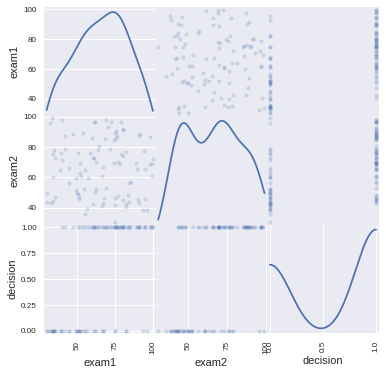

In [8]:
scatter_matrix(train, alpha=0.2, figsize=(6, 6), diagonal='kde')

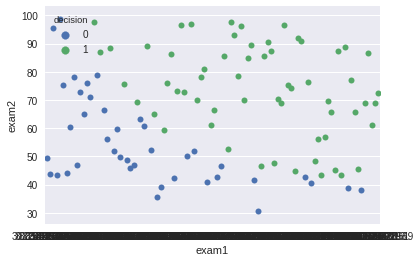

In [9]:
sns.swarmplot(x='exam1', y="exam2", data=train, hue="decision", size=6)

In [16]:
X=train[['exam1','exam2']]
y=train['decision']

estimator=LogisticRegression(max_iter =100000)

param_grid = { 'solver':['newton-cg','lbfgs','liblinear','sag',],
              'tol':[0.00001,0.0001,0.001,0.01,0.1],
              'class_weight':[None,'balanced']
             }

grid_search=GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='log_loss', n_jobs=-1, cv=10)

grid_search.fit(X, y)
print(grid_search.best_estimator_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.1, verbose=0, warm_start=False)


In [18]:
classifier=LogisticRegression(max_iter =100000,C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.1, verbose=0, warm_start=False)

model = classifier.fit(X,y)
predictions = model.predict(X)
print("accuracy score " + str(accuracy_score(predictions,y)))
print("precision score " + str(precision_score(predictions,y)))
print("recall score " + str(recall_score(predictions,y)))

accuracy score 0.89
precision score 0.916666666667
recall score 0.901639344262
